In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import os

In [125]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [126]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [127]:
df.drop_duplicates(inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)

#rename columns into a more meaningful names
colnames = {'x': 'length', 
           'y': 'width',
           'z': 'depth',
           'depth': 'total_depth'}
df.rename(columns = colnames, inplace = True)
df

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [128]:
df.describe()

,carat,total_depth,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [129]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(include='number').columns.tolist()
num_columns.remove('price')

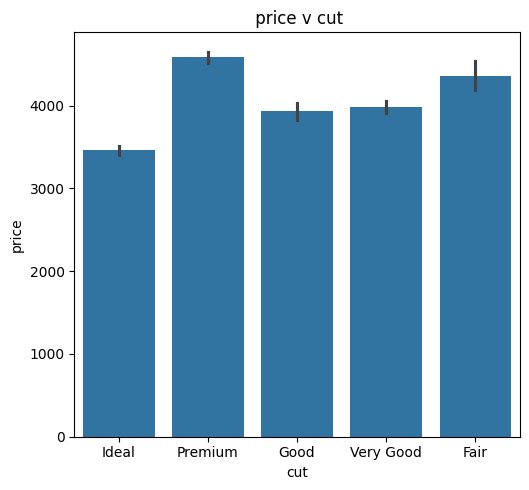

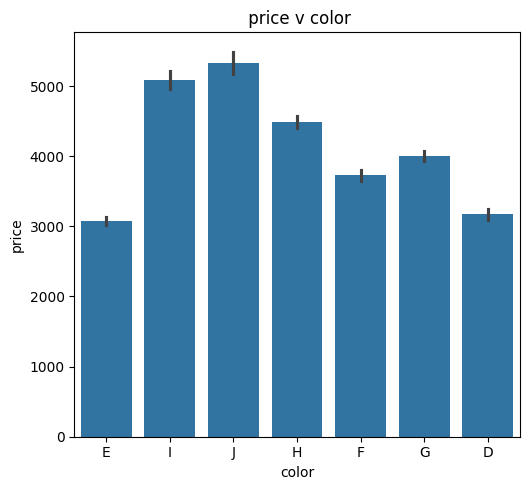

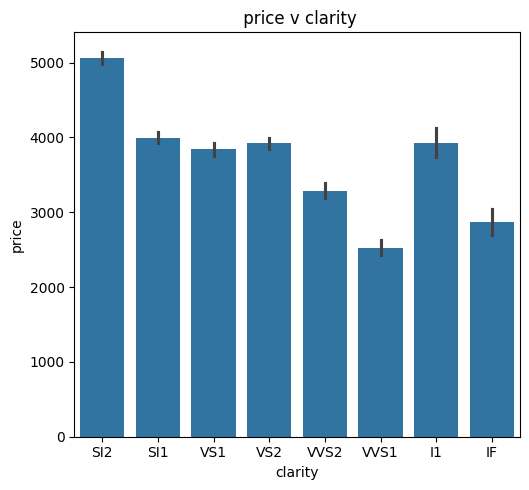

In [130]:
for col in cat_columns:
    plt.figure(figsize=[10,5])

    plt.subplot(1,2,1)
    sns.barplot(x=col, y='price', data = df)
    plt.title(f' price v {col}')
   
    plt.tight_layout()
    plt.show()

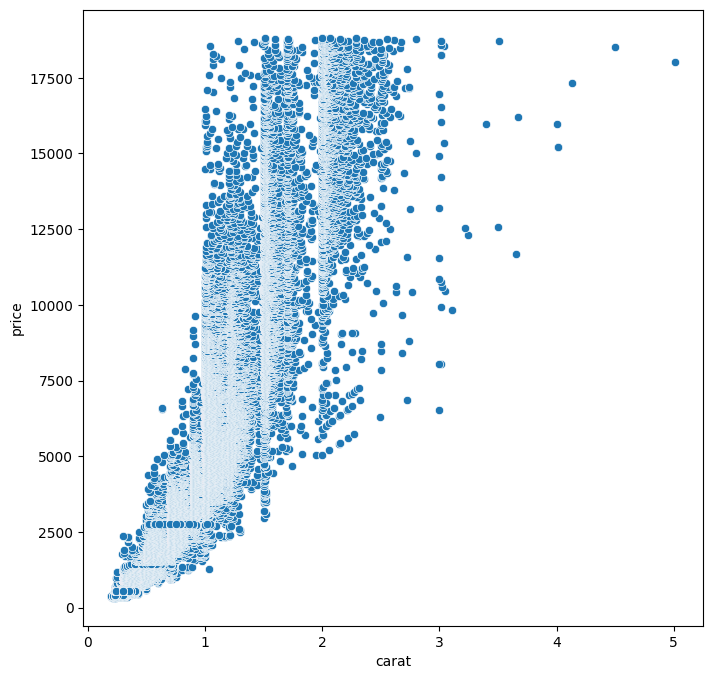

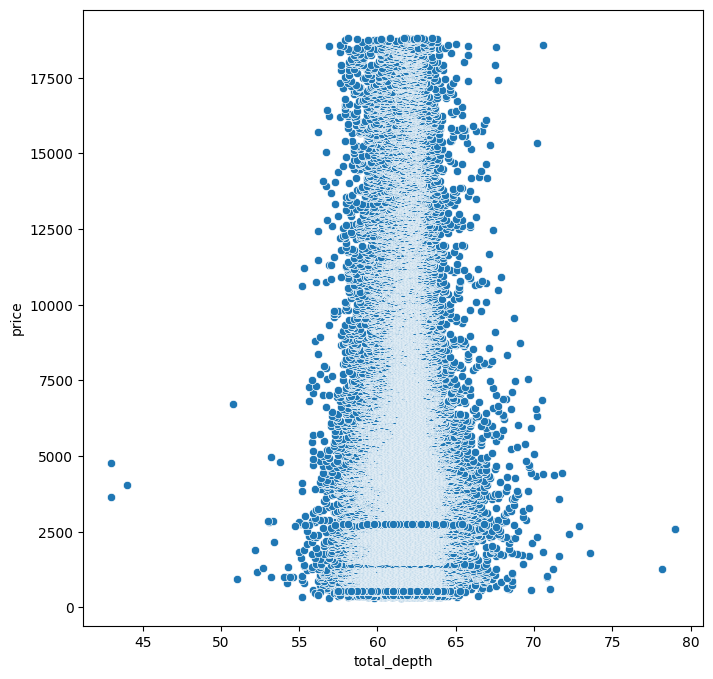

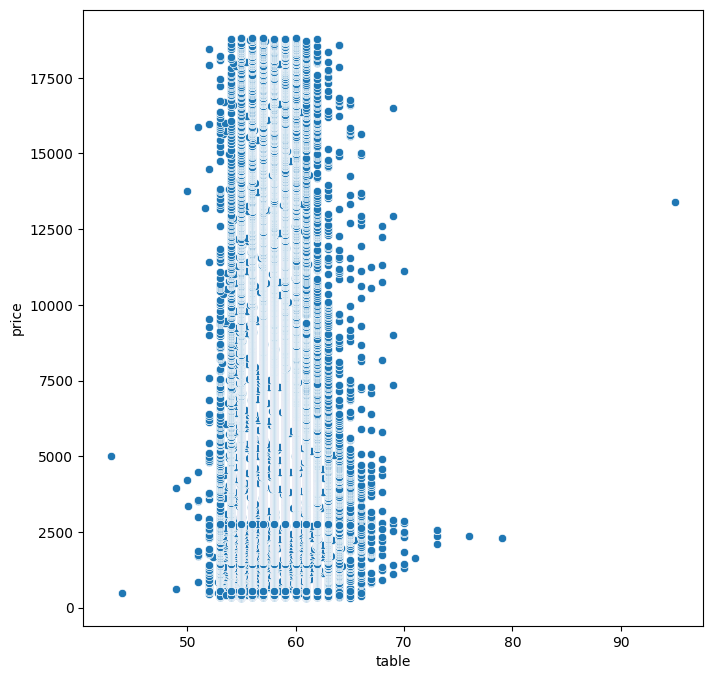

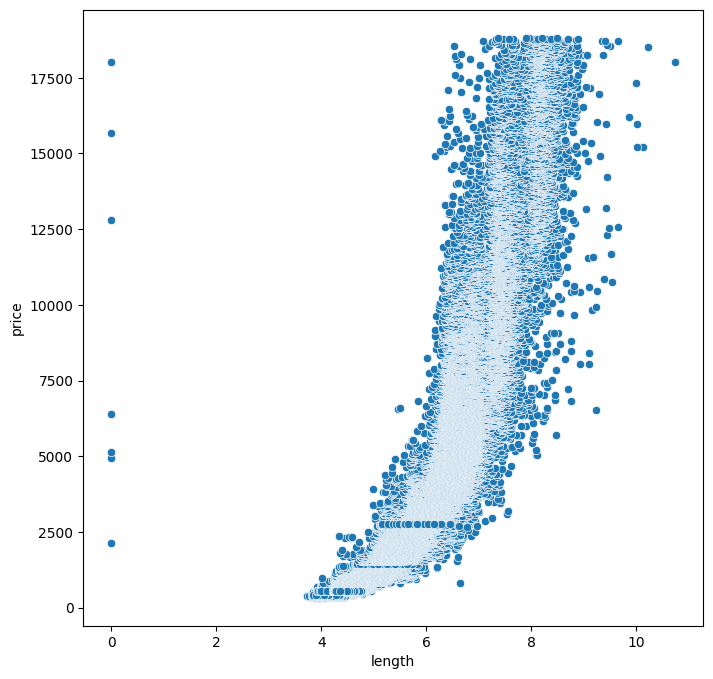

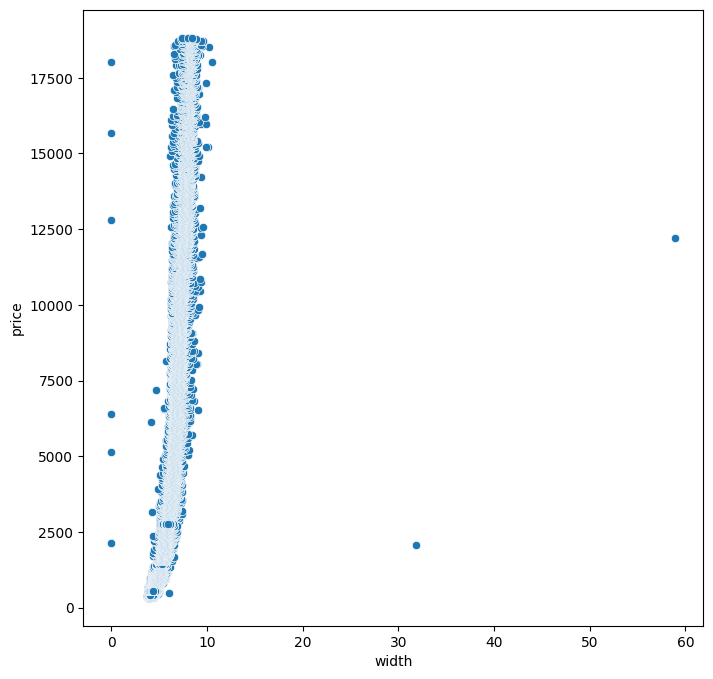

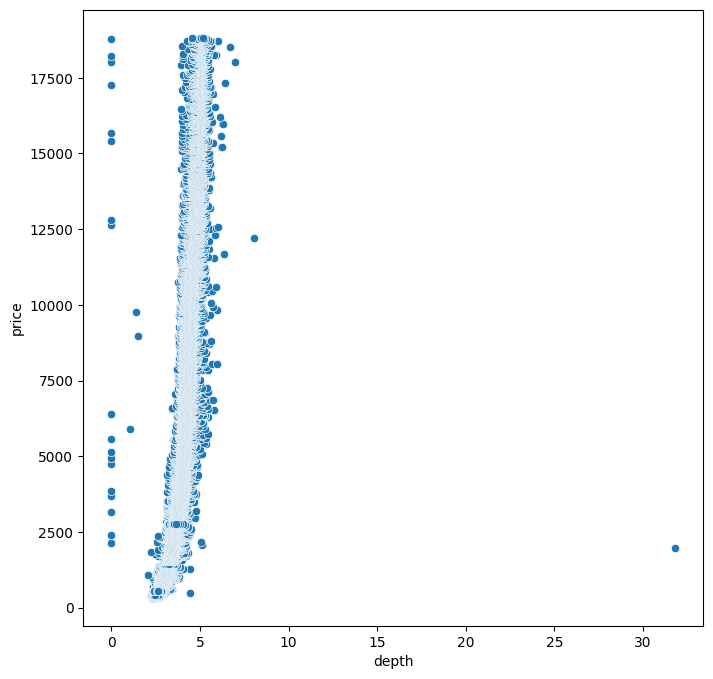

In [131]:
for col in num_columns:
    plt.figure(figsize=[8,8])
    sns.scatterplot(x=col, y='price', data = df)
    plt.show()

In [132]:
#Dropping the outliers. 
df = df[(df["total_depth"]<75)&(df["total_depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["length"]<30)]
df = df[(df["width"]<30)]
df = df[(df["depth"]<30)&(df["depth"]>2)]
df.shape


(53907, 10)

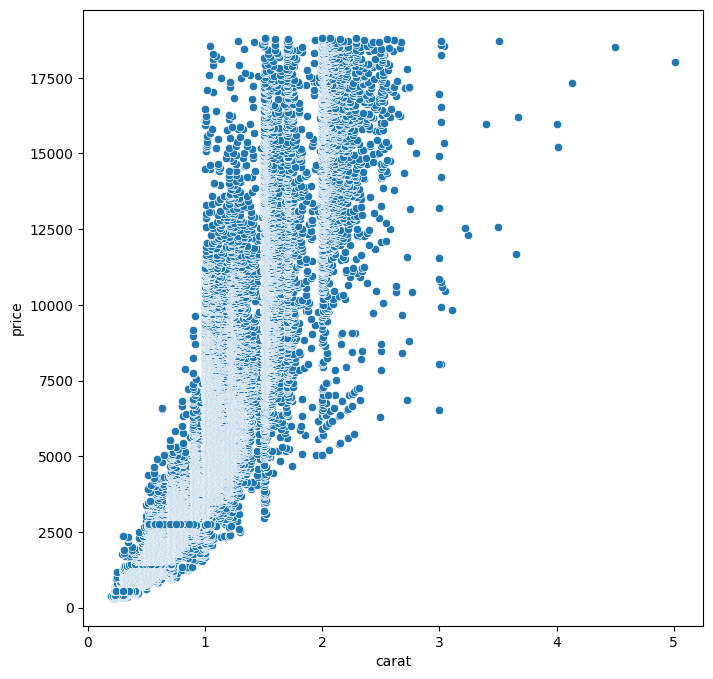

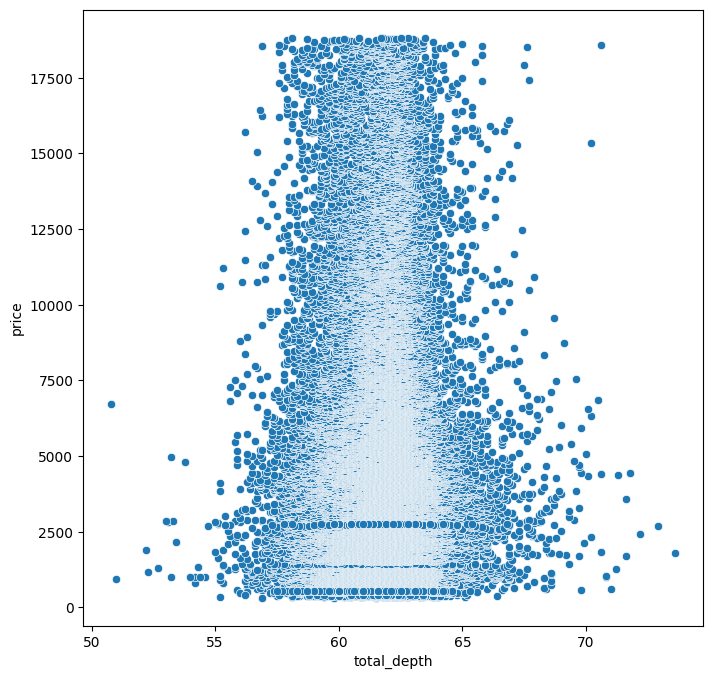

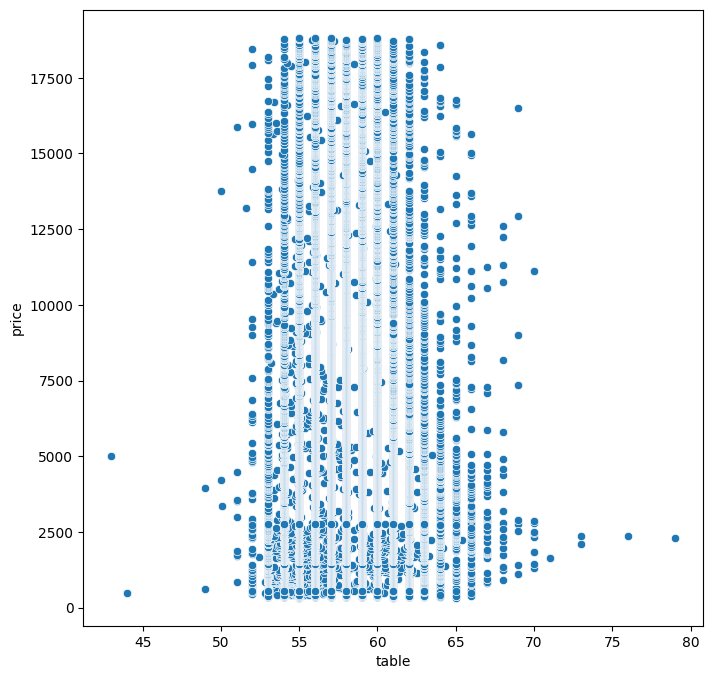

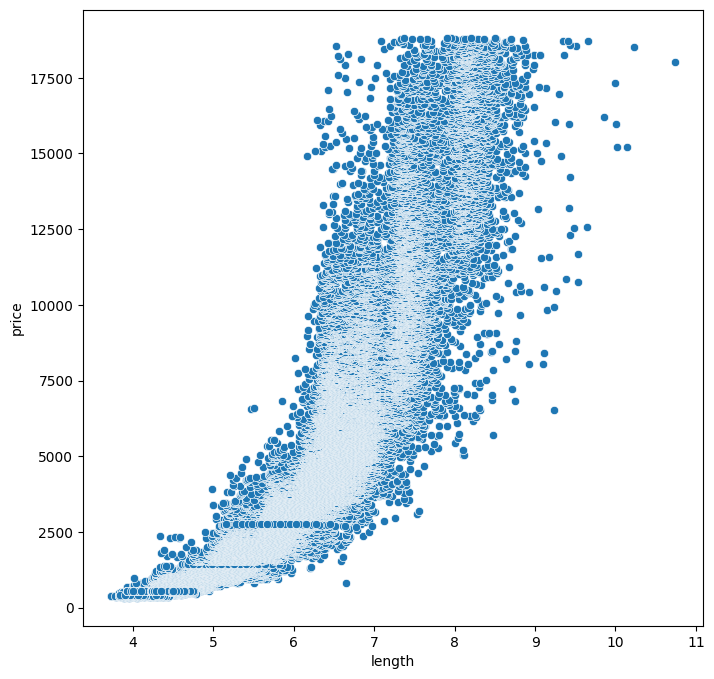

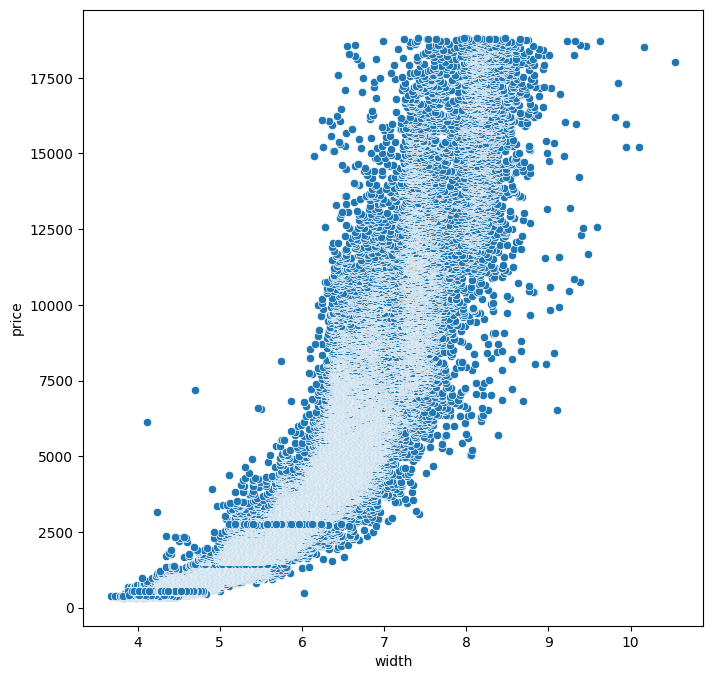

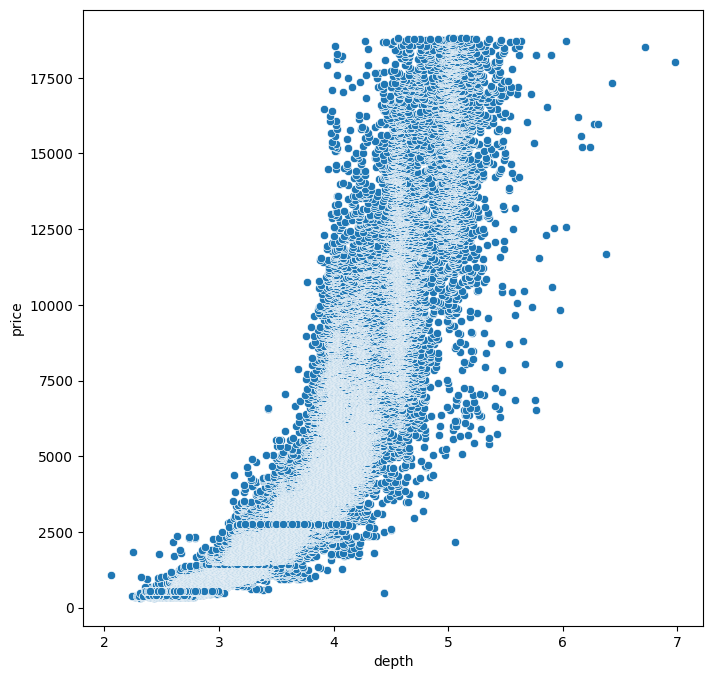

In [133]:
for col in num_columns:
    plt.figure(figsize=[8,8])
    sns.scatterplot(x=col, y='price', data = df)
    plt.show()

In [134]:
df['area'] = df['length'] * df['width']

In [135]:
correlation_matrix = df[['carat', 'total_depth', 'table', 'price', 'length', 'width', 'depth', 'area']].corr()
correlation_matrix


,carat,total_depth,table,price,length,width,depth,area
carat,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037,0.992023
total_depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525,-0.029376
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670,0.190293
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634,0.910987
length,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665,0.994808
width,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327,0.994658
depth,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000,0.986337
area,0.992023,-0.029376,0.190293,0.910987,0.994808,0.994658,0.986337,1.000000


In [136]:
df[num_columns].corrwith(df['price'])

carat          0.921590
total_depth   -0.010287
table          0.127108
length         0.887212
width          0.888807
depth          0.882634
dtype: float64

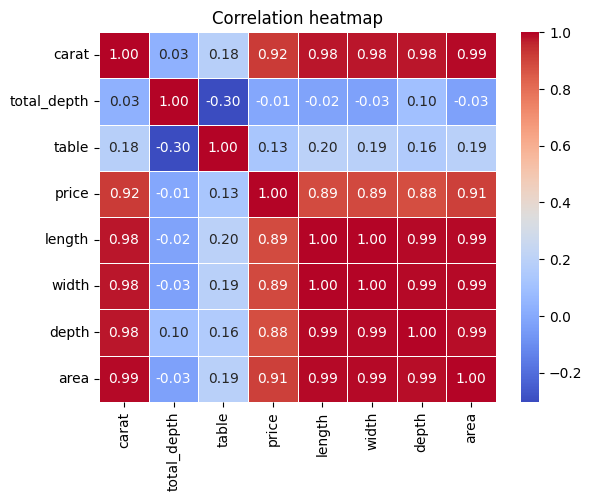

In [137]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation heatmap')
plt.show()

In [138]:
#Linera Rgression 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat','depth', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()

lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))

Training accuracy: 0.9245515334463583


In [139]:
y_pred = lr.predict(X_test)
print('R2 Score :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score : 0.9244657159502276
Root mean squared error: 1080.7292062940155


In [140]:
#Feature Engineering Backward elimination 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat','depth', 'color', 'cut', 'clarity', 'area']] # took out length and width because area is already related feature related 
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))


Training accuracy: 0.919837641475419


In [141]:
y_pred = lr.predict(X_test)
print('R2 Score  :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score  : 0.9196755558150262
Root mean squared error: 1114.4708003563128


it has some impact on accuracy


In [142]:
#Feature Engineering Backward elimination 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat', 'color', 'cut', 'clarity', 'area', 'length', 'width']] # removing Depth  - correlation score of 0.86 
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))

Training accuracy: 0.9232586720318773


 taking out the Depth did not affect the model 

In [143]:
y_pred = lr.predict(X_test)
print('R2 Score  :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score  : 0.9233819955162519
Root mean squared error: 1088.4544218033466


In [144]:



y = df['price'].to_numpy(dtype = float)
x = df[['carat', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
x = pd.get_dummies(x).to_numpy(dtype = float)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    print("MSE: ", mse)
    print("r2: ", r2)
    
    return r2, mse



In [145]:
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()

gbr = GradientBoostingRegressor()
lnr = LinearRegression()
xgb = XGBRegressor()
knr = KNeighborsRegressor()

models = [rfr,dtr, gbr, lnr, xgb , knr]
names = ["Random Forest", "DecisionTreeRegressor","Gradient Boosting", "Linear Regression","XGB Regressor" , "KNeighbors Regressor" ]

In [146]:
r2s, mses = [], []
for i, j in zip(models, names):
    print("*"*30)
    print(j)
    r2, mse = training(i)
    r2s += [r2]
    mses += [mse]
    print("\n\n")

******************************
Random Forest
MSE:  299402.0482133719
r2:  0.9806373360717946



******************************
DecisionTreeRegressor
MSE:  536360.7254485013
r2:  0.9653129544933957



******************************
Gradient Boosting
MSE:  525289.2104936988
r2:  0.9660289616968373



******************************
Linear Regression
MSE:  1184733.0283432577
r2:  0.9233819955162519



******************************
XGB Regressor
MSE:  299093.7636408103
r2:  0.9806572731784656



******************************
KNeighbors Regressor
MSE:  504002.3086675323
r2:  0.9674056093470198





C:\Users\jijai\AppData\Local\Temp\ipykernel_22352\3026033645.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)
C:\Users\jijai\AppData\Local\Temp\ipykernel_22352\3026033645.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)


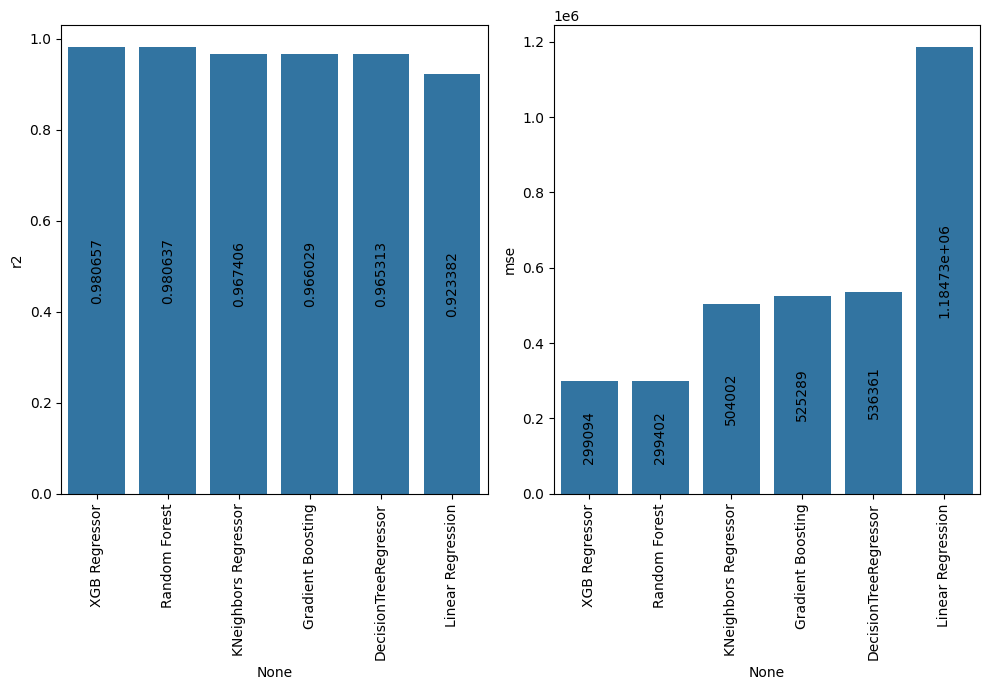

In [147]:
dt = pd.DataFrame({"r2":r2s, "mse": mses}, index=names)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
index = 0
dt = dt.sort_values("r2", ascending=False)
sns.barplot(x=dt.index, y=dt.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container, label_type="center", rotation=90)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)

index += 1
dt = dt.sort_values("mse", ascending=True)
sns.barplot(x=dt.index, y=dt.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container, label_type="center", rotation=90)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()